# How To Load And Display Images

In [1]:
from PIL import Image

image = Image.open("image.jpg")
print(image.format)
print(image.mode)
print(image.size)
image.show()

JPEG
RGB
(2048, 1152)


# How To Convert Images To Numpy Arrays And Back

### Loading and Displaying Image Using MatPlotLib

Shape:  (1152, 2048, 3)
Dtype:  uint8


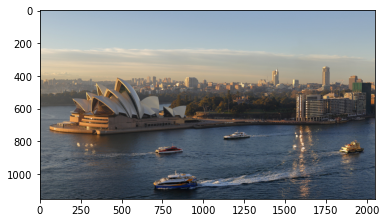

In [2]:
from matplotlib import image, pyplot

image2 = image.imread("image.jpg")
print("Shape: ",image2.shape)
print("Dtype: ",image2.dtype)

pyplot.imshow(image2)
pyplot.show()

### Load Photo As Pillow Object, Convert To Numpy Array, And Back To Image

In [3]:
from numpy import asarray

image3 = Image.open("image.jpg")

image_array = asarray(image3)
print("Array shape: ",image_array.shape)

image3_2 = Image.fromarray(image_array)

print("Format: ",image3_2.format)
print("Mode: ", image3_2.mode)
print("Size: ", image3_2.size)

Array shape:  (1152, 2048, 3)
Format:  None
Mode:  RGB
Size:  (2048, 1152)


### Loading All Images From A Directory

In [4]:
from os import listdir
loaded_images = list()
for filename in listdir("images"):
    img = image.imread("image.jpg")
    loaded_images.append(img)
    print(f"> Loaded {filename} {img.shape}")
    

> Loaded Cov_ablines_covidmanifestations_paper1.png (1152, 2048, 3)
> Loaded Cov_blines_covidmanifestation_paper2.png (1152, 2048, 3)
> Loaded Cov_blines_thoraric_paperfig1.png (1152, 2048, 3)
> Loaded Cov_blines_thoraric_paperfig2.png (1152, 2048, 3)
> Loaded Cov_blines_thoraric_paperfig3.png (1152, 2048, 3)


### Saving Loaded Images

In [5]:
image = Image.open("image.jpg")
image.save("image.png", format="PNG")
img = Image.open("image.png")
print("Second image format: ", img.format)

Second image format:  PNG


### Converting Image To GrayScale

In [6]:
image = Image.open("image.jpg")
gs_image = image.convert(mode="L")
gs_image.save("image_grayscale.jpg")
img = Image.open("image_grayscale.jpg")
img.show()

### Resizing While Maintaining The Aspect Ratio

In [7]:
img.thumbnail((100, 100))
print(img.size)
img.show()

(100, 56)


### Resizing And Changing The Aspect Ratio

In [8]:
img = Image.open("image_grayscale.jpg")
img_resized = img.resize((200, 200))
print(img_resized.size)
img_resized.show()

(200, 200)


# Flip, Rotate, and Crop Images

### Flip

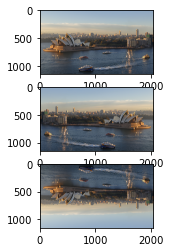

In [9]:
image = Image.open("image.jpg")
hozflip = image.transpose(Image.FLIP_LEFT_RIGHT)
verflip = image.transpose(Image.FLIP_TOP_BOTTOM)

pyplot.subplot(311)
pyplot.imshow(image)
pyplot.subplot(312)
pyplot.imshow(hozflip)
pyplot.subplot(313)
pyplot.imshow(verflip)
pyplot.show()

### Rotate

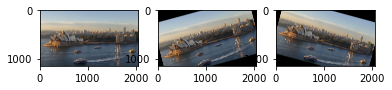

In [10]:
pyplot.subplot(131)
pyplot.imshow(image)
pyplot.subplot(132)
pyplot.imshow(image.rotate(15))
pyplot.subplot(133)
pyplot.imshow(image.rotate(-15))
pyplot.show()

### Crop

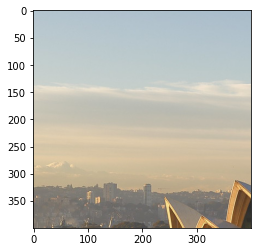

In [11]:
cropped = image.crop((100, 100, 500, 500))
pyplot.imshow(cropped)
pyplot.show()

# Manually Scaling Image Pixel Data

Format: JPEG
Mode: RGB
Size: (799, 540)


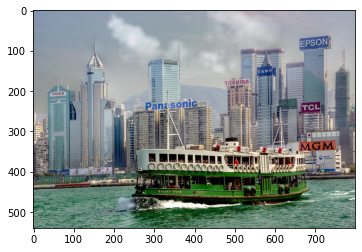

In [12]:
image = Image.open("hogkong.jpg")

print(f"Format: {image.format}")
print(f"Mode: {image.mode}")
print(f"Size: {image.size}")
pyplot.imshow(image)

### Normalizing Pixel Values

In [14]:
pixels = asarray(image)
print(f"Data type: {pixels.dtype}")
print(f"Pixels values range: max={pixels.max()}, min={pixels.min()}")
#converting data type
pixels = pixels.astype("float32")
# normalizing
pixels /= 255.0
print(f"New range: max={pixels.max()}, min={pixels.min()}")

Data type: uint8
Pixels values range: max=255, min=0
New range: max=1.0, min=0.0


# Centering Pixel Values

### Global Centering

In [20]:
image = Image.open("hogkong.jpg")
pixels = asarray(image)
pixels = pixels.astype("float32")
mean = pixels.mean()
print(f"Mean: {mean}")
print(f"Min: {pixels.min()}, Max: {pixels.max()}")
pixels = pixels-mean
mean = pixels.mean()
print("Mean: %.3f" %mean)
print(f"Min: {pixels.min()}, Max: {pixels.max()}")

Mean: 133.28196716308594
Min: 0.0, Max: 255.0
Mean: 0.000
Min: -133.28196716308594, Max: 121.71803283691406


### Local Centering

In [25]:
pixels = asarray(image)
pixels = pixels.astype("float32")

means = pixels.mean(axis=(0,1), dtype="float64")
print(f"Means: {means}")
print(f"Max: {pixels.max(axis=(0,1))}, Min{pixels.max(axis=(0,1))}")
pixels -= means
means = pixels.mean(axis=(0,1), dtype="float64")
print(f"Means: {means}")
print(f"Max: {pixels.max(axis=(0,1))}, Min: {pixels.min(axis=(0,1))}")

Means: [127.15582209 137.07551106 135.61465026]
Max: [255. 255. 255.], Min[255. 255. 255.]
Means: [-4.98204400e-07 -2.54787028e-07 -4.65708084e-08]
Max: [127.84418 117.92449 119.38535], Min: [-127.15582 -137.07552 -135.61465]


# Pixel Values Standardization

### Global Standardization